# 中学生成绩的影响因素

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('data/datasets_251_561_student-mat.csv')
df = pd.DataFrame(data)

D:\CAzhuanye\Anaconda\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
print("df.keys():\n", df.keys())

df.keys():
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


key 名翻译
学校类型 性别 年龄 城市/农村 家庭人数 父母是否同居 母亲学历 父亲学历 母亲工作 父亲工作 选择学校的原因 监护人 上学路上花费时间 周学习时长 挂科数 辅导班 家庭辅导 付费辅导班 课外活动 托儿所 进修意愿 网课 谈恋爱 家庭和睦程度 空闲时间 交友 工作日饮酒 周末饮酒 健康程度 缺课 第一学年成绩 第二学年成绩 最终成绩 

a.我们首先来查看饮酒与成绩的关系,父母学历对成绩的影响

Text(0.5, 0, 'G3')

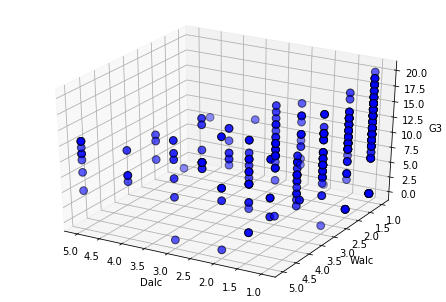

In [3]:
from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()

ax = Axes3D(figure,elev =  30,azim = 120)
ax.scatter(df['Dalc'],df['Walc'],df['G3'], c='b', s=60, edgecolor='k')
ax.set_xlabel("Dalc")
ax.set_ylabel("Walc")
ax.set_zlabel("G3")


Text(0.5, 0, 'G3')

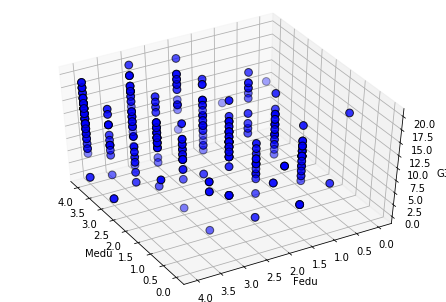

In [4]:
figure = plt.figure()
ax = Axes3D(figure,elev = 45,azim = 150)
ax.scatter(df['Medu'],df[ 'Fedu'],df['G3'], c='b', s=60, edgecolor='k')
ax.set_xlabel("Medu")
ax.set_ylabel("Fedu")
ax.set_zlabel("G3")

b.运用LinearRegression算法预测学生最终成绩
首先排除未能参加最终考核的学生

首先先对数据进行整理

In [5]:
df = df[df['G3'] != 0 ]

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df_dummies = pd.get_dummies(df.loc[:,'school':'absences'])
df_dummies_1 = pd.get_dummies(df.loc[:,'school':'G2'])

In [8]:
print(df_dummies.columns,df_dummies_1.columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object') Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Wal

In [9]:
features = df_dummies.loc[:, 'age':'romantic_yes']
# Extract NumPy arrays
X = features.values
y = df['G3'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (357, 56)  y.shape: (357,)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train_b, X_test_b,Y_train_b, Y_test_b = train_test_split(X,y,random_state=0)

In [11]:
linear_tree= LinearRegression(). fit(X_train_b, Y_train_b)
linear_tree_g3_train = linear_tree.predict(X_train_b)
linear_tree_g3_test = linear_tree.predict(X_test_b)

In [12]:
X_train_b.shape

(267, 56)

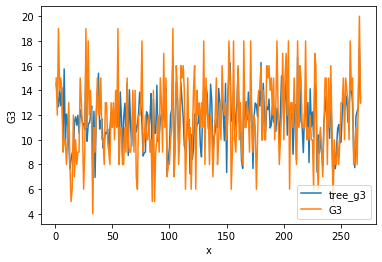

In [13]:
a = np.linspace(1,267,267)
plt.plot(a,linear_tree_g3_train,label="tree_g3")
plt.plot(a,Y_train_b,label="G3")
plt.ylabel("G3" )
plt.xlabel("x")
plt.legend()

In [14]:
X_test_b.shape

(90, 56)

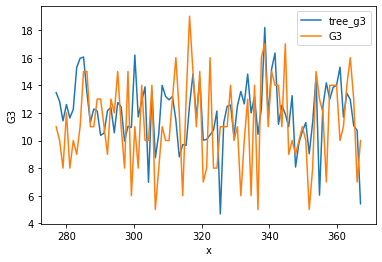

In [15]:
b = np.linspace(277,367,90)
plt.plot(b,linear_tree_g3_test,label="tree_g3")
plt.plot(b,Y_test_b,label="G3")
plt.ylabel("G3" )
plt.xlabel("x")
plt.legend()

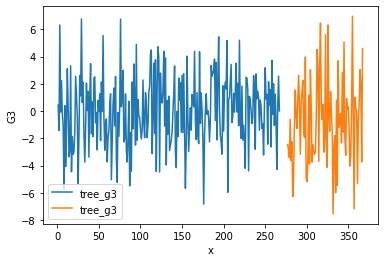

In [16]:
plt.plot(a,Y_train_b-linear_tree_g3_train,label="tree_g3")
plt.plot(b,Y_test_b-linear_tree_g3_test,label="tree_g3")
plt.ylabel("G3" )
plt.xlabel("x")
plt.legend()

加上前两次考核后经行预测

In [17]:
features = df_dummies_1.loc[:, 'age':'romantic_yes']
# Extract NumPy arrays
X = features.values
y = df['G3'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (357, 58)  y.shape: (357,)


In [18]:
X_train_b, X_test_b,Y_train_b, Y_test_b = train_test_split(X,y,random_state=0)

In [19]:
linear_tree= LinearRegression(). fit(X_train_b, Y_train_b)
linear_tree_g3_train = linear_tree.predict(X_train_b)
linear_tree_g3_test = linear_tree.predict(X_test_b)

In [20]:
X_train_b.shape

(267, 58)

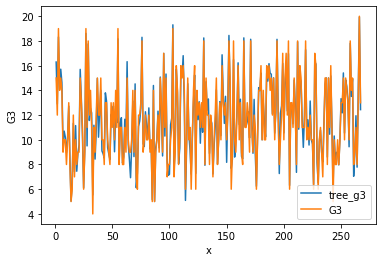

In [21]:
a = np.linspace(1,267,267)
plt.plot(a,linear_tree_g3_train,label="tree_g3")
plt.plot(a,Y_train_b,label="G3")
plt.ylabel("G3" )
plt.xlabel("x")
plt.legend()

In [22]:
X_test_b.shape

(90, 58)

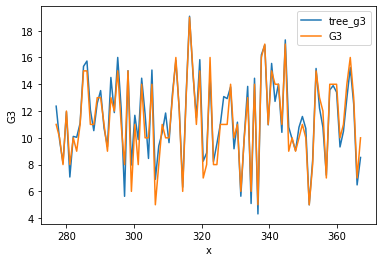

In [23]:
b = np.linspace(277,367,90)
plt.plot(b,linear_tree_g3_test,label="tree_g3")
plt.plot(b,Y_test_b,label="G3")
plt.ylabel("G3" )
plt.xlabel("x")
plt.legend()

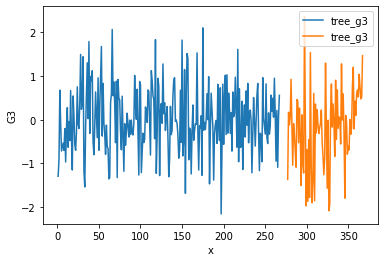

In [24]:
plt.plot(a,Y_train_b-linear_tree_g3_train,label="tree_g3")
plt.plot(b,Y_test_b-linear_tree_g3_test,label="tree_g3")
plt.ylabel("G3" )
plt.xlabel("x")
plt.legend()

据此我们有理由怀疑，G3主要是由G1，G2测试得出的，故做只由G1，G2的实验来对照

In [25]:
X = df.loc[:,['G1','G2']]
y = df['G3']

In [26]:
X_train_b, X_test_b,Y_train_b, Y_test_b = train_test_split(X,y,random_state=0)

In [27]:
linear_tree= LinearRegression(). fit(X_train_b, Y_train_b)
linear_tree_g3_train = linear_tree.predict(X_train_b)
linear_tree_g3_test = linear_tree.predict(X_test_b)

In [28]:
X_train_b.shape

(267, 2)

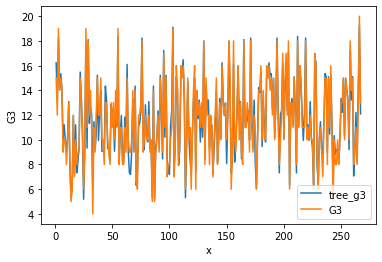

In [29]:
a = np.linspace(1,267,267)
plt.plot(a,linear_tree_g3_train,label="tree_g3")
plt.plot(a,Y_train_b,label="G3")
plt.ylabel("G3" )
plt.xlabel("x")
plt.legend()

In [30]:
X_test_b.shape

(90, 2)

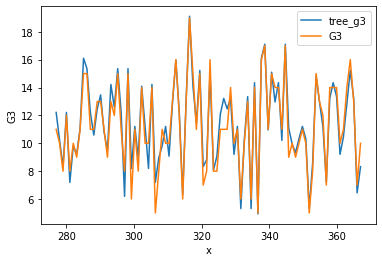

In [31]:
b = np.linspace(277,367,90)
plt.plot(b,linear_tree_g3_test,label="tree_g3")
plt.plot(b,Y_test_b,label="G3")
plt.ylabel("G3" )
plt.xlabel("x")
plt.legend()

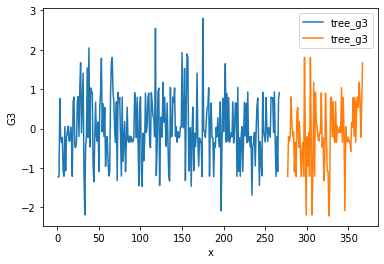

In [32]:
plt.plot(a,Y_train_b-linear_tree_g3_train,label="tree_g3")
plt.plot(b,Y_test_b-linear_tree_g3_test,label="tree_g3")
plt.ylabel("G3" )
plt.xlabel("x")
plt.legend()

哪些人会在第三次考试得0分？

In [33]:
df = data[data['G3'] == 0 ]
df.shape

(38, 33)

In [34]:
Zero = data[data['G3'] == 0 ].append(data[data['G3'] != 0 ].sample(60))
Zero.shape

(98, 33)

In [35]:
data_dummies = pd.get_dummies(Zero.loc[:,'school':'absences'])

In [36]:
data_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [37]:
y0 = [0 for i in range(38)]
y1 = [1 for i in range(60)]
y = np.array(y0 + y1).reshape(-1, 1)

In [38]:
features = data_dummies.loc[:, 'age':'romantic_yes']
#X = Zero.loc[:,('G1','G2')]
X = features.values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (98, 56)  y.shape: (98, 1)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=0)

In [40]:
#引入svm
from sklearn.svm import LinearSVC 
#设置参数
linear_svm = LinearSVC(max_iter=30).fit(X_train,y_train)
print("{}".format(linear_svm))
#结果输出
print("训练集:", linear_svm.score(X_train, y_train))
print("测试集:", linear_svm.score(X_test, y_test))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=30,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
训练集: 0.958904109589041
测试集: 0.92


D:\CAzhuanye\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\CAzhuanye\Anaconda\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)   
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

D:\CAzhuanye\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\CAzhuanye\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\CAzhuanye\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\CAzhuanye\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\CAzhuanye\Anaconda\Anaconda3\lib\site-packages\ipykernel_laun

In [42]:
temp = linear_svm.score(X_test, y_test)
temps = [ temp for i in range(10)]

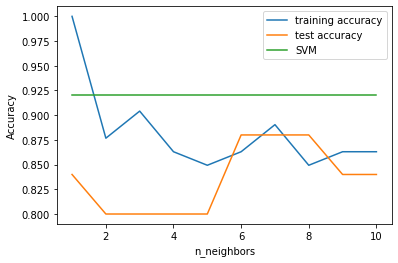

In [43]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.plot(neighbors_settings,temps, label="SVM")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()